# Traffic Counts for Each Neighborhood
## By Ben Radovic
Dataset for Traffic Data: [here](https://data.wprdc.org/dataset/allegheny-county-traffic-counts/resource/8edd8a76-8607-4ed3-960f-dcae914fd937?view_id=838354b4-3f5d-46ab-ad01-06c1dc233472)

Dataset for Neighborhoods: [here](https://data.wprdc.org/dataset/neighborhoods2)

In [1]:
import geopandas as gpd
import pandas as pd

# Load in neighborhoods
neighborhoods_data = gpd.read_file('Neighborhoods_.shp')

neighborhoods_data.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


We can relate the latitude and longitude from the database of traffic counts to the actual neighborhood names by checking if they fall within those of each polygon object within this dataset

Now we will load in the dataset with the traffic counts

In [2]:
# Loaad in the traffic counts
counts = gpd.read_file('data-trafficcounts.csv')

counts.head(3)

,sensor_ID,Longitude,Latitude,1a,2a,3a,4a,5a,6a,7a,...,4p,5p,6p,7p,8p,9p,10p,11p,12a,geometry
0,5879@1,-79.86152302,40.62539823,44,19,14,18,36,151,362,...,604,678,790,575,431,416,227,188,119,None
1,5970@1,-79.79640914,40.44504722,18,19,24,31,100,223,356,...,561,535,402,315,258,200,119,78,36,None
2,5957@1,-79.82097619,40.48762446,60,36,39,27,45,165,395,...,637,662,715,611,511,429,247,170,106,None


Next, we will create a new dataset that is much easier to read

In [3]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "Highest_Traffic"])
neighborhoods["Neighborhood"] = neighborhoods_data["hood"]
neighborhoods["Geometry"] = neighborhoods_data["geometry"]
neighborhoods["Highest_Traffic"] = 0

neighborhoods.head(3)

,Neighborhood,Geometry,Highest_Traffic
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0


Now, we can iterate through the traffic data and assign the highest value to each neighborhood.

In [4]:
from shapely.geometry import Point

for i, count in counts.iterrows():
    # Search for the day with the highest count
    highest = counts.loc[i, "1a":"12a"].max()
    # Create a point out of the latitude and longitude
    pt = Point(float(count["Longitude"]), float(count["Latitude"]))
    for j, neighborhood in neighborhoods.iterrows():
        # Add the count to the proper neighborhood
        if neighborhood["Geometry"].contains(pt):
            neighborhoods.at[j, 'Highest_Traffic'] = float(highest)
            # Break to save time once found
            break
            
neighborhoods.head(3)

,Neighborhood,Geometry,Highest_Traffic
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",82.0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",94.0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",82.0


Now we will sort the data within the dataframe.

In [5]:
# Create a mask to ensure only the neighborhoods with data are portrayed
query_mask = neighborhoods['Highest_Traffic'] > 0
neighborhoods_masked = neighborhoods[query_mask]
# Sort in ascending order to see the neighborhoods with the least average traffic
neighborhoods_sorted = neighborhoods_masked.sort_values("Highest_Traffic", ascending = True)

neighborhoods_sorted.head(10)

,Neighborhood,Geometry,Highest_Traffic
79,Spring Garden,"POLYGON ((-79.98687 40.47413, -79.98598 40.472...",8.000000
47,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",9.000000
65,Troy Hill,"MULTIPOLYGON (((-79.97766 40.46653, -79.97771 ...",9.000000
83,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",9.000000
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",9.500000
49,Arlington,"POLYGON ((-79.95773 40.41871, -79.95769 40.418...",9.666667
17,Homewood North,"POLYGON ((-79.89446 40.46255, -79.89446 40.462...",50.000000
55,East Hills,"POLYGON ((-79.87523 40.45979, -79.87448 40.459...",58.000000
69,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",63.000000
70,Sheraden,"POLYGON ((-80.03990 40.45262, -80.03994 40.452...",75.000000


So far, we can see that Spring Garden has the least average traffic counts according to this dataset. Let's now go ahead and plot the 25 neighborhoods with the lowest average traffic counts.

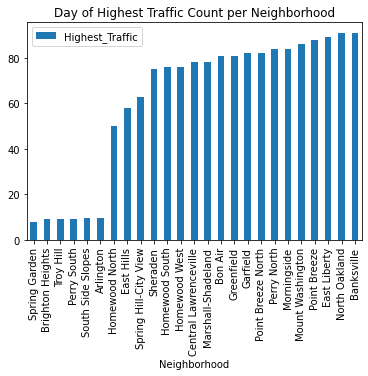

In [6]:
plt = neighborhoods_sorted.iloc[:25].plot(kind='bar', x="Neighborhood", y="Highest_Traffic", title="Day of Highest Traffic Count per Neighborhood")

Now we will also list and plot the neighborhoods with the 25 highest average traffic counts.

In [7]:
neighborhoods_descending = neighborhoods_masked.sort_values("Highest_Traffic", ascending = False)

neighborhoods_descending.head(10)

,Neighborhood,Geometry,Highest_Traffic
73,St. Clair,"POLYGON ((-79.96995 40.41188, -79.96932 40.411...",997.0
72,Beechview,"POLYGON ((-80.02121 40.42342, -80.02111 40.423...",993.0
21,Lincoln-Lemington-Belmar,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",986.0
33,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",984.0
87,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",983.0
60,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",981.0
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",977.0
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",976.0
36,Highland Park,"POLYGON ((-79.91356 40.48644, -79.91354 40.486...",967.0
25,Hays,"POLYGON ((-79.95606 40.40916, -79.95625 40.408...",964.0


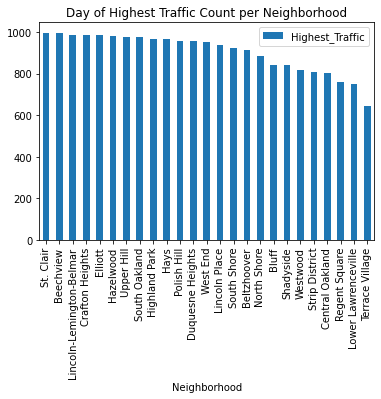

In [8]:
plt2 = neighborhoods_descending.iloc[:25].plot(kind='bar', x="Neighborhood", y="Highest_Traffic", title="Day of Highest Traffic Count per Neighborhood")

Finally, I will upload the traffic counts to the original geodataframe to plot it.

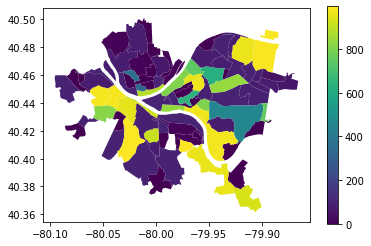

In [9]:
neighborhoods_data["1a"] = neighborhoods["Highest_Traffic"]

neighborhoods_data.plot(column="1a", legend=True)

This is the end of the data analysis for the traffic counts for different neighborhoods. On this geodataframe, the lower numbers (purple-blueish on the diagram) are actually better because they signify lower traffic counts, and those are what I am considering to be the better neighborhoods.